In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [11]:
plt.style.use("seaborn-v0_8")

In [15]:
import os
os.getcwd()

'C:\\Users\\hp'

In [32]:
conda install openpyxl

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [34]:
!pip install openpyxl


In [36]:
df = pd.read_excel(r"C:\Users\hp\Downloads\CafeIQ-Analytics\cafe_sales_50000_rows_revenue.xlsx")

In [38]:
df.head()

,Cafe Name,Product Type,Product Name,Date,Sales (Total Revenue),Price of Product,Cost of Product
0,Daily Grind,Bakery,Garlic Bread,2023-06-02,12402,106,57
1,Mocha House,Dessert,Donut,2023-11-15,8424,351,264
2,Sip & Snack,Cold Beverage,Cold Coffee,2024-03-16,40950,150,106
3,Java Junction,Dessert,Cheesecake,2025-07-08,70620,330,185
4,Brew Bliss,Tea,Masala Tea,2024-12-17,10251,153,94


In [40]:
print("shape:", df.shape)
df.info()
df.describe()
df.isnull().sum()

shape: (50000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Cafe Name              50000 non-null  object
 1   Product Type           50000 non-null  object
 2   Product Name           50000 non-null  object
 3   Date                   50000 non-null  object
 4   Sales (Total Revenue)  50000 non-null  int64 
 5   Price of Product       50000 non-null  int64 
 6   Cost of Product        50000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


Cafe Name                0
Product Type             0
Product Name             0
Date                     0
Sales (Total Revenue)    0
Price of Product         0
Cost of Product          0
dtype: int64

In [42]:
#data contains 50,000+ transaction records including revenue, customer, and order-level data.

In [44]:
df.drop_duplicates(inplace=True)

In [46]:
df.isnull().sum()
df.fillna(0, inplace=True)

In [50]:
print(df.columns)



Index(['Cafe Name', 'Product Type', 'Product Name', 'Date',
       'Sales (Total Revenue)', 'Price of Product', 'Cost of Product'],
      dtype='object')


In [52]:
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace("(", "", regex=False)
    .str.replace(")", "", regex=False)
    .str.lower()
)

print(df.columns)


Index(['cafe_name', 'product_type', 'product_name', 'date',
       'sales_total_revenue', 'price_of_product', 'cost_of_product'],
      dtype='object')


In [54]:
df['date'] = pd.to_datetime(df['date'])
df['sales_total_revenue'] = df['sales_total_revenue'].astype(float)
df['price_of_product'] = df['price_of_product'].astype(float)
df['cost_of_product'] = df['cost_of_product'].astype(float)


In [56]:
df['profit'] = df['sales_total_revenue'] - df['cost_of_product']



In [58]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()
df['day_name'] = df['date'].dt.day_name()


In [62]:
df = df[df['sales_total_revenue'] > 0]


In [64]:
# KPI Calculations 

In [66]:
total_revenue = df['sales_total_revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 1912274981.0


In [70]:
total_orders = df['product_name'].nunique()
print("Total Orders:", total_orders)

Total Orders: 21


In [72]:
aov = total_revenue / total_orders
print("Average Order Value:", round(aov,2))

Average Order Value: 91060713.38


In [76]:
total_customers = df['product_name'].nunique()
print("Total Customers:", total_customers)


Total Customers: 21


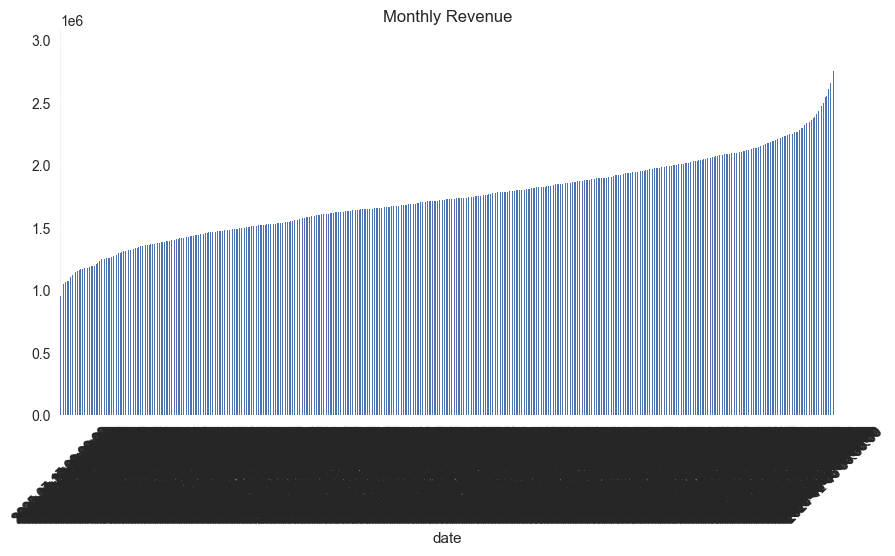

In [82]:
monthly_rev = df.groupby('date')['sales_total_revenue'].sum().sort_values()

monthly_rev.plot(kind='bar', figsize=(10,5))
plt.title("Monthly Revenue")
plt.xticks(rotation=45)
plt.show()


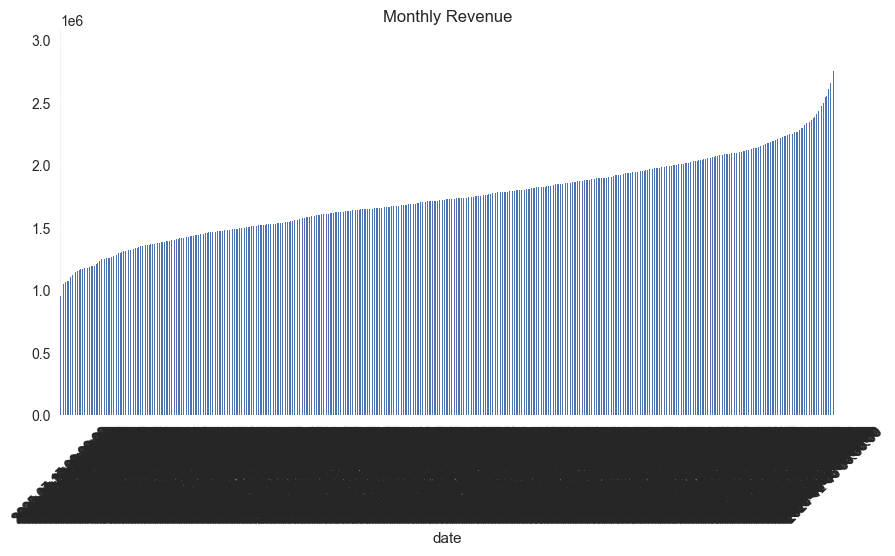

In [84]:
monthly_rev = df.groupby('date')['sales_total_revenue'].sum().sort_values()

monthly_rev.plot(kind='bar', figsize=(10,5))
plt.title("Monthly Revenue")
plt.xticks(rotation=45)
plt.show()


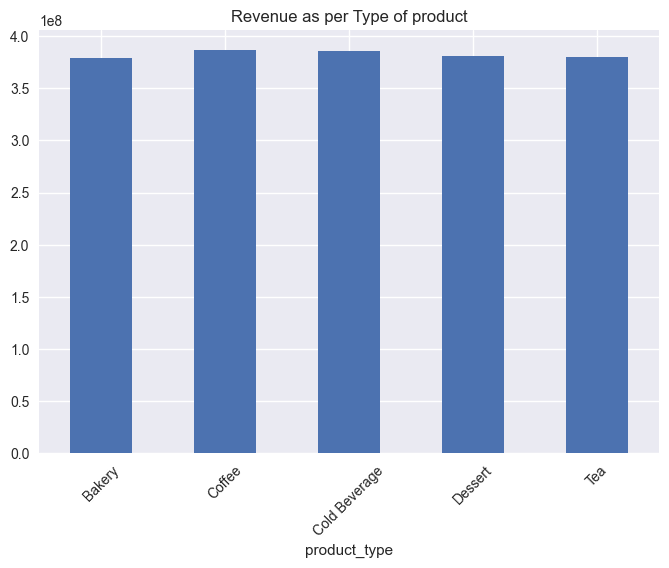

In [90]:
day_rev = df.groupby('product_type')['sales_total_revenue'].sum()

day_rev.plot(kind='bar')
plt.title("Revenue as per Type of product")
plt.xticks(rotation=45)
plt.show()


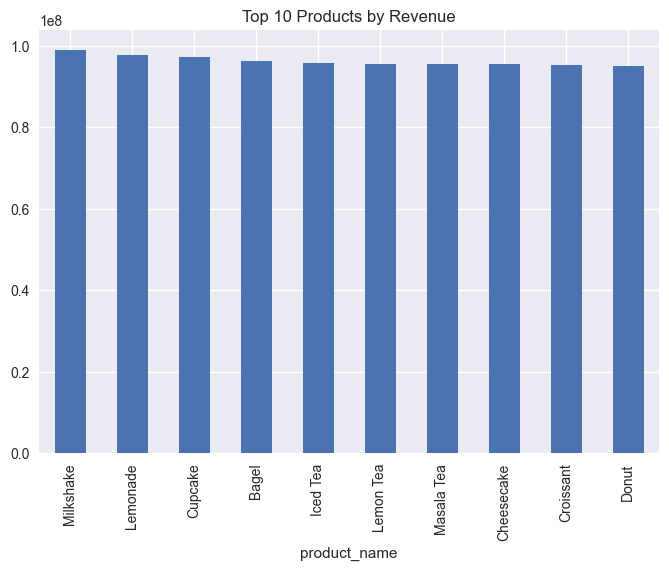

In [92]:
top_products = df.groupby('product_name')['sales_total_revenue'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()


In [104]:
# Cohort Analysis (Advanced)

In [112]:
df['date'].dtype

period[M]

In [118]:
df['order_month'] = df['date']


In [122]:
cohort_data = df.groupby(['product_type','date'])['product_name'].nunique().reset_index()

cohort_pivot = cohort_data.pivot(index='product_type',
                                 columns='date',
                                 values='product_name')

cohort_pivot.head()


date,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,...,2025-03,2025-04,2025-05,2025-06,2025-07,2025-08,2025-09,2025-10,2025-11,2025-12
product_type,,,,,,,,,,,,,,,,,,,,,
Bakery,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Coffee,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
Cold Beverage,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Dessert,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Tea,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [124]:
df.to_csv("cleaned_cafe_data.csv", index=False)


In [128]:
import os
os.getcwd()


'C:\\Users\\hp'

In [130]:
os.listdir()


['.anaconda',
 '.android',
 '.conda',
 '.condarc',
 '.continuum',
 '.cursor',
 '.gitconfig',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.streamlit',
 '.virtual_documents',
 '.vscode',
 'AI_Hackathon',
 'AI_Hackathon_Voice_Analytics.ipynb.ipynb',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'CafeIQ – Revenue & Customer Growth Analytics',
 'call_sample.wav',
 'Chayose_Sales_Analysis.ipynb',
 'cleaned_cafe_data.csv',
 'Contacts',
 'Cookies',
 'creditcard.csv',
 'credit_card_fradulant_transaction_detection_byme.ipynb',
 'Data Analysis(Hotel Booking).ipynb',
 'Documents',
 'Downloads',
 'Favorites',
 'fraud_model.pkl',
 'hotel_bookings 2.csv',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Microsoft',
 'movie data analysis netflix.ipynb',
 'Music',
 'My Documents',
 'mymoviedb.csv',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{6f1349e9-9cb5-11f0-8753-c803c2e5ab97}.TM.blf',
 'NTUSER.DAT{6